<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 18s 56ms/step - loss: 0.6328 - accuracy: 0.6015 - val_loss: 0.3650 - val_accuracy: 0.8421
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3050 - accuracy: 0.8766 - val_loss: 0.3183 - val_accuracy: 0.8653
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2445 - accuracy: 0.9057 - val_loss: 0.3373 - val_accuracy: 0.8714
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2205 - accuracy: 0.9172 - val_loss: 0.3040 - val_accuracy: 0.8770
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0.1943 - accuracy: 0.9284 - val_loss: 0.3381 - val_accuracy: 0.8548
Epoch 6/100
176/176 [==============================] - 9s 52ms/step - loss: 0.1861 - accuracy: 0.9319 - val_loss: 0.3482 - val_accuracy: 0.8620
Epoch 7/100
176/176 [==============================] - 9s 52ms/step - loss: 0.1610 - accuracy: 0.9405 - val_loss: 0.33

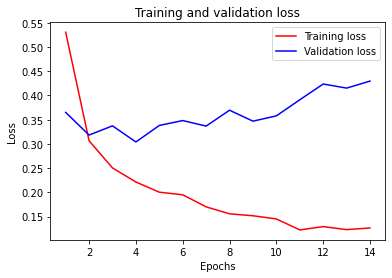

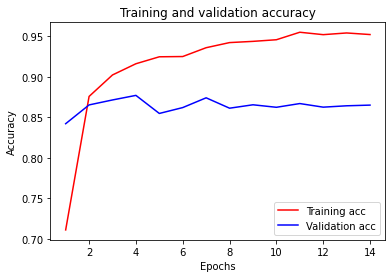

              precision    recall  f1-score   support

           0      0.875     0.880     0.877     12500
           1      0.879     0.874     0.877     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 11s 54ms/step - loss: 0.6311 - accuracy: 0.6235 - val_loss: 0.3890 - val_accuracy: 0.8360
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3678 - accuracy: 0.8398 - val_loss: 0.3159 - val_accuracy: 0.8686
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2571 - accuracy: 0.8996 - val_loss: 0.3129 - val_accuracy: 0.8676
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2134 - accuracy: 0.9206 - val_loss: 0.3114 - val_accuracy: 0.8761
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0.

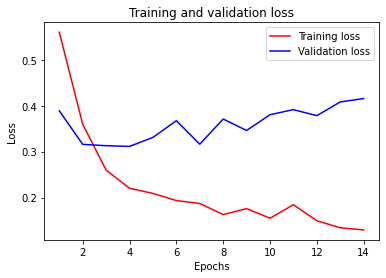

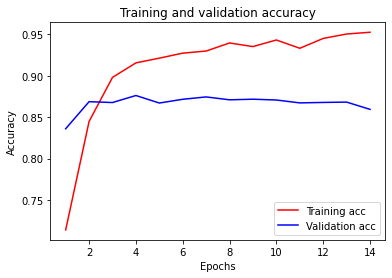

              precision    recall  f1-score   support

           0      0.910     0.834     0.871     12500
           1      0.847     0.918     0.881     12500

    accuracy                          0.876     25000
   macro avg      0.879     0.876     0.876     25000
weighted avg      0.879     0.876     0.876     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 11s 55ms/step - loss: 0.6564 - accuracy: 0.6084 - val_loss: 0.3900 - val_accuracy: 0.8342
Epoch 2/100
176/176 [==============================] - 9s 53ms/step - loss: 0.3555 - accuracy: 0.8499 - val_loss: 0.3927 - val_accuracy: 0.8456
Epoch 3/100
176/176 [==============================] - 9s 53ms/step - loss: 0.2932 - accuracy: 0.8828 - val_loss: 0.3129 - val_accuracy: 0.8711
Epoch 4/100
176/176 [==============================] - 9s 53ms/step - loss: 0.2296 - accuracy: 0.9106 - val_loss: 0.3035 - val_accuracy: 0.8748
Epoch 5/100
176/176 [==============================] - 9s 53ms/step - loss: 0.

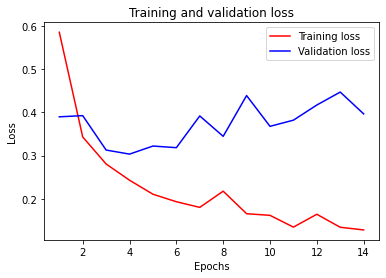

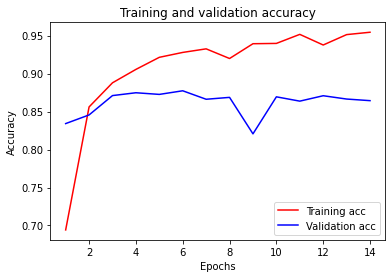

              precision    recall  f1-score   support

           0      0.881     0.866     0.874     12500
           1      0.868     0.884     0.876     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 11s 55ms/step - loss: 0.6334 - accuracy: 0.6296 - val_loss: 0.3465 - val_accuracy: 0.8549
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3332 - accuracy: 0.8643 - val_loss: 0.3613 - val_accuracy: 0.8541
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2659 - accuracy: 0.8973 - val_loss: 0.3291 - val_accuracy: 0.8598
Epoch 4/100
176/176 [==============================] - 9s 53ms/step - loss: 0.2310 - accuracy: 0.9130 - val_loss: 0.3009 - val_accuracy: 0.8734
Epoch 5/100
176/176 [==============================] - 9s 53ms/step - loss: 0.

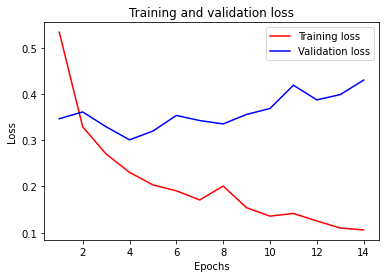

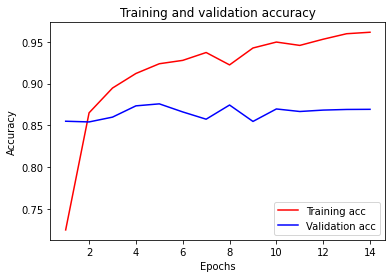

              precision    recall  f1-score   support

           0      0.869     0.879     0.874     12500
           1      0.877     0.868     0.873     12500

    accuracy                          0.873     25000
   macro avg      0.873     0.873     0.873     25000
weighted avg      0.873     0.873     0.873     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 11s 55ms/step - loss: 0.6340 - accuracy: 0.6089 - val_loss: 0.4503 - val_accuracy: 0.8208
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3694 - accuracy: 0.8539 - val_loss: 0.3269 - val_accuracy: 0.8636
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2602 - accuracy: 0.8977 - val_loss: 0.2951 - val_accuracy: 0.8775
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2223 - accuracy: 0.9144 - val_loss: 0.3829 - val_accuracy: 0.8276
Epoch 5/100
176/176 [==============================] - 9s 53ms/step - loss: 0.

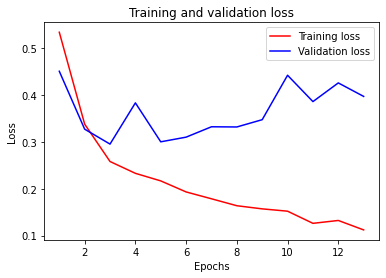

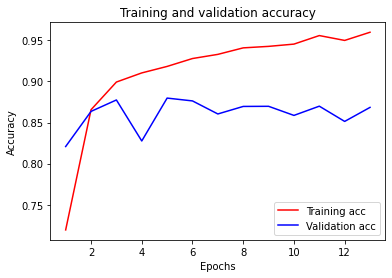

              precision    recall  f1-score   support

           0      0.857     0.907     0.881     12500
           1      0.901     0.848     0.874     12500

    accuracy                          0.877     25000
   macro avg      0.879     0.877     0.877     25000
weighted avg      0.879     0.877     0.877     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 12s 56ms/step - loss: 0.6485 - accuracy: 0.6172 - val_loss: 0.3764 - val_accuracy: 0.8382
Epoch 2/100
176/176 [==============================] - 9s 53ms/step - loss: 0.3234 - accuracy: 0.8690 - val_loss: 0.3243 - val_accuracy: 0.8623
Epoch 3/100
176/176 [==============================] - 9s 53ms/step - loss: 0.3407 - accuracy: 0.8544 - val_loss: 0.3244 - val_accuracy: 0.8628
Epoch 4/100
176/176 [==============================] - 9s 53ms/step - loss: 0.2428 - accuracy: 0.9071 - val_loss: 0.3173 - val_accuracy: 0.8729
Epoch 5/100
176/176 [==============================] - 9s 53ms/step - loss: 0.

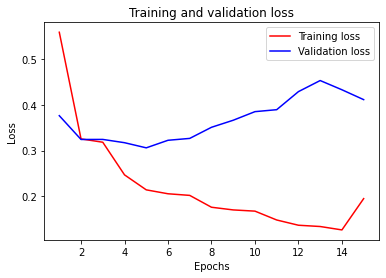

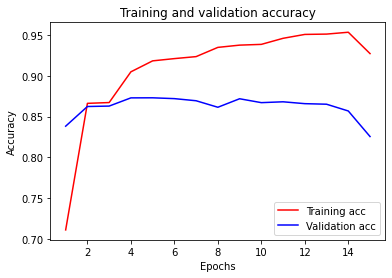

              precision    recall  f1-score   support

           0      0.863     0.887     0.875     12500
           1      0.883     0.859     0.871     12500

    accuracy                          0.873     25000
   macro avg      0.873     0.873     0.873     25000
weighted avg      0.873     0.873     0.873     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 11s 54ms/step - loss: 0.6678 - accuracy: 0.6066 - val_loss: 0.3866 - val_accuracy: 0.8318
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3371 - accuracy: 0.8621 - val_loss: 0.3086 - val_accuracy: 0.8699
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2573 - accuracy: 0.9003 - val_loss: 0.3075 - val_accuracy: 0.8736
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2135 - accuracy: 0.9181 - val_loss: 0.2976 - val_accuracy: 0.8810
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0.

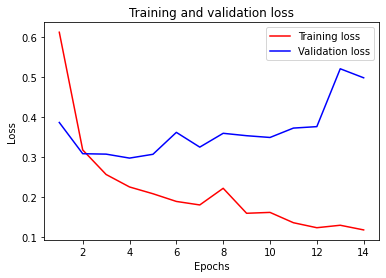

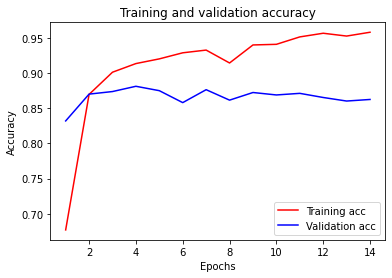

              precision    recall  f1-score   support

           0      0.894     0.865     0.879     12500
           1      0.869     0.897     0.883     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 11s 54ms/step - loss: 0.6512 - accuracy: 0.6012 - val_loss: 0.3611 - val_accuracy: 0.8421
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3183 - accuracy: 0.8681 - val_loss: 0.3107 - val_accuracy: 0.8696
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2434 - accuracy: 0.9052 - val_loss: 0.3008 - val_accuracy: 0.8724
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2188 - accuracy: 0.9191 - val_loss: 0.3176 - val_accuracy: 0.8716
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0.

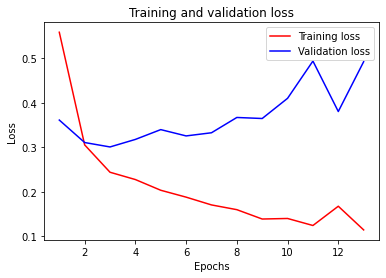

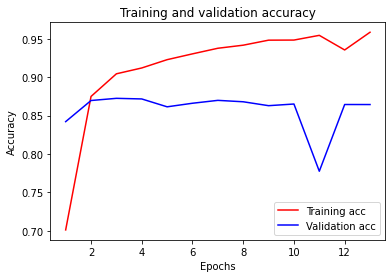

              precision    recall  f1-score   support

           0      0.879     0.864     0.871     12500
           1      0.866     0.881     0.874     12500

    accuracy                          0.872     25000
   macro avg      0.873     0.872     0.872     25000
weighted avg      0.873     0.872     0.872     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 11s 54ms/step - loss: 0.6516 - accuracy: 0.6165 - val_loss: 0.4052 - val_accuracy: 0.8313
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.3391 - accuracy: 0.8597 - val_loss: 0.3120 - val_accuracy: 0.8719
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2559 - accuracy: 0.9019 - val_loss: 0.3079 - val_accuracy: 0.8761
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2627 - accuracy: 0.8974 - val_loss: 0.3065 - val_accuracy: 0.8754
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0.

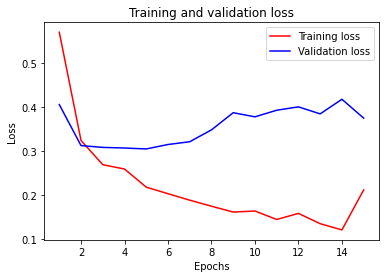

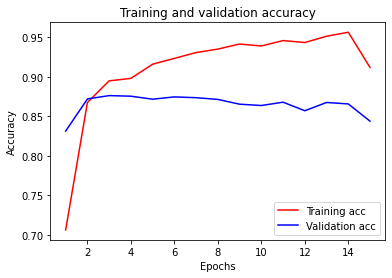

              precision    recall  f1-score   support

           0      0.857     0.892     0.874     12500
           1      0.887     0.851     0.869     12500

    accuracy                          0.872     25000
   macro avg      0.872     0.872     0.872     25000
weighted avg      0.872     0.872     0.872     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 12s 55ms/step - loss: 0.6191 - accuracy: 0.6304 - val_loss: 0.3371 - val_accuracy: 0.8552
Epoch 2/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2983 - accuracy: 0.8803 - val_loss: 0.2851 - val_accuracy: 0.8824
Epoch 3/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2533 - accuracy: 0.9013 - val_loss: 0.2868 - val_accuracy: 0.8810
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 0.2083 - accuracy: 0.9220 - val_loss: 0.2983 - val_accuracy: 0.8808
Epoch 5/100
176/176 [==============================] - 9s 52ms/step - loss: 0

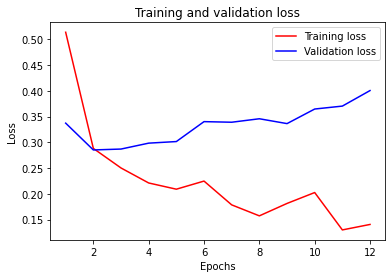

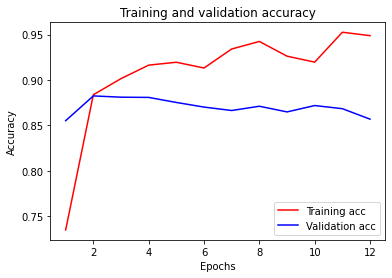

              precision    recall  f1-score   support

           0      0.886     0.877     0.882     12500
           1      0.879     0.888     0.883     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


Average accuracy: 0.8787 (+/- 0.0055)
Average loss: 0.2953 (+/- 0.0132)
Average F1: 0.8760 (+/- 0.0047)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
